# Session 10: Fast Fourier Transform

Date: 11/27/2017, Monday

In [1]:
format compact

## Generate input signal

Fourier transform is widely used in signal processing. Let's looks at the simplest cosine signal first.

Define
$$
y_1(t) = 0.3 + 0.7\cos(2\pi f_1t)
$$

It has a magnitude of 0.7, with a constant bias term 0.3. We choose the frequency $f_1=0.5$.

In [2]:
t = -5:0.1:4.9; % time axis
N = length(t) % size of the signal

f1 = 0.5; % signal frequency
y1 = 0.3 + 0.7*cos(2*pi*f1*t); % the signal

N =
   100


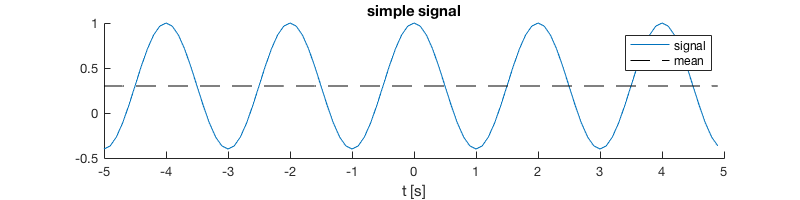

In [3]:
%plot -s 800,200
hold on
plot(t, y1) 
plot(t, 0.3*ones(N,1), '--k')
title('simple signal')
xlabel('t [s]')
legend('signal', 'mean')

## Perform Fourier transform on the signal

You can hand code the [Fourier matrix](https://en.wikipedia.org/wiki/DFT_matrix) as in the class, but here we use the built-in function for convenience. 

In [4]:
F1 = fft(y1);
length(F1) % same as the length of the signal 

ans =
   100


There are two different conventions for the normalization factor in the Fourier matrix. One is having the normalization factor $\frac{1}{\sqrt{N}}$ in the both the Fourier matrix $A$ and the inverse transform matrix $B$

$$
A = \frac{1}{\sqrt{N}} \begin{bmatrix}
1&1&1&\cdots &1 \\
1&\omega&\omega^2&\cdots&\omega^{N-1} \\
1&\omega^2&\omega^4&\cdots&\omega^{2(N-1)}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&\omega^{N-1}&\omega^{2(N-1)}&\cdots&\omega^{(N-1)(N-1)}\\
\end{bmatrix}
$$

$$
B = \frac{1}{\sqrt{N}} \begin{bmatrix}
1&1&1&\cdots &1 \\
1&\omega^{-1}&\omega^{-2}&\cdots&\omega^{-(N-1)} \\
1&\omega^{-2}&\omega^{-4}&\cdots&\omega^{-2(N-1)}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&\omega^{-(N-1)}&\omega^{-2(N-1)}&\cdots&\omega^{-(N-1)(N-1)}\\
\end{bmatrix}
$$

MATLAB uses a [different convention](https://www.mathworks.com/help/matlab/ref/fft.html#buuutyt-6) that 

$$
A = \begin{bmatrix}
1&1&1&\cdots &1 \\
1&\omega&\omega^2&\cdots&\omega^{N-1} \\
1&\omega^2&\omega^4&\cdots&\omega^{2(N-1)}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&\omega^{N-1}&\omega^{2(N-1)}&\cdots&\omega^{(N-1)(N-1)}\\
\end{bmatrix}
$$

$$
B = \frac{1}{N} \begin{bmatrix}
1&1&1&\cdots &1 \\
1&\omega^{-1}&\omega^{-2}&\cdots&\omega^{-(N-1)} \\
1&\omega^{-2}&\omega^{-4}&\cdots&\omega^{-2(N-1)}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&\omega^{-(N-1)}&\omega^{-2(N-1)}&\cdots&\omega^{-(N-1)(N-1)}\\
\end{bmatrix}
$$


The difference doesn't matter too much as long as you use one of them consistently. In both cases there is
\begin{align}
F &= AY \text{ (Discrete Fourier transfrom)} \\
Y &= BF \text{ (Inverse transfrom)} 
\end{align}


### Full spectrum

The spectrum `F1` (the result of the Fourier transfrom) is typically an array of complex numbers. To plot it we need to use absolute magnitude.

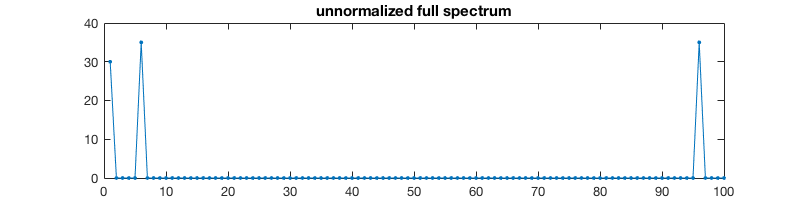

In [5]:
%plot -s 800,200
plot(abs(F1),'- .')
title('unnormalized full spectrum')

The first term in `F1` indicates the magnitude of the constant term (zero frequency). Diving by `N` gives us the actual value.

In [6]:
F1(1)/N % equal to the constant bias term specified at the beginning

ans =
    0.3000


Besides the constant bias `F1(1)`, there are two non-zero pointings in `F1`, indicating the cosine signal itself. The magnitude 0.7 is evenly distributed to two points.

In [7]:
F1(2+4)/N, F1(end-4)/N % adding up to 0.7

ans =
  -0.3500 - 0.0000i
ans =
  -0.3500 + 0.0000i


Plotting `F1/N` shows more clearly the magnitude of signals at different frequencies:

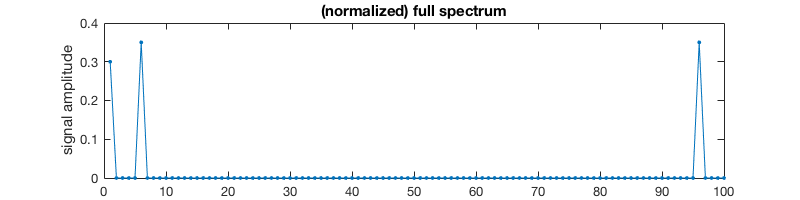

In [8]:
%plot -s 800,200
plot(abs(F1)/N,'- .')
title('(normalized) full spectrum')
ylabel('signal amplitude')

### Half-sided spectrum

From the matrix $A$ it is easy to show that, the first element `F(1)` in the resulting spectrum is always a real number indicating the constant bias term, while the rest of the array `F(2:end)` is symmetric, i.e. `F(2) == F(end)`, `F(3) == F(end-1)`. ( `F(2)` is actually the conjugate of `F(end)`, but we only care about magnitude here. )

Due to such symmetricity, we can simply plot half of the array (scaled by 2) without loss of information.

In [9]:
M = N/2 % need to cast to integer if N is an odd number

M =
    50


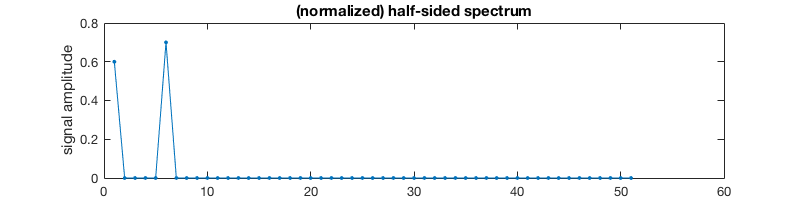

In [10]:
%plot -s 800,200
plot(abs(F1(1:M+1))/N*2, '- .')
title('(normalized) half-sided spectrum')
ylabel('signal amplitude')

## Understanding units!

The Discrete Fourier Transform, by defintion, is simply a matrix multiplication which acts on pure numbers. But real physical signals have units. You cannot just treat the resulting array `F1` as some unitless frequency. If the signal is a time series then you need to deal with seconds and hertz; if it is a wave in the space then you need to deal with the wave length in meters. 

In order to understand the unit of the resulting spectrum `F1`, let's look at the original time series `y1` first.

The "time step" of the signal is

In [11]:
dt = t(2)-t(1) % [s]

dt =
    0.1000


This is the finest temporal resolution the signal can have. It corresponds the highest frequency:

In [12]:
f_max = 1/dt % [Hz]

f_max =
   10.0000


On the contrary, the longest time range (`dt*N`, the time span of the entire signal) corresponds to the lowest frequency:

In [13]:
df = f_max/N % [Hz]

df =
    0.1000


With the lowest frequency `df` being the "step size" in the frequency axis, the value of the frequency axis is simply the array [0, df, 2*df, ...]. Now we can use correct values and units for the x-axis of the spectrum plot.

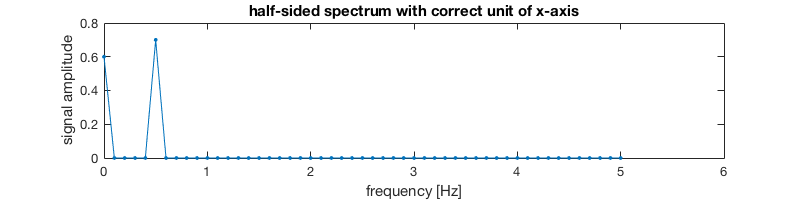

In [14]:
%plot -s 800,200
plot(df*(0:M), abs(F1(1:M+1))/N*2,'- .')
title('half-sided spectrum with correct unit of x-axis')
ylabel('signal amplitude')
xlabel('frequency [Hz]')

**The peak is at 0.5 Hz, consistent with our original signal which has a period of 2 s, since 0.5 Hz = 1/(2s). Thus our unit specification is correct.**

## Deal with negative frequency

The right half of the spectrum array (`F1(M+2:end)`, not plotted in the above figure) corresponds to negative frequency [-M\*df, ..., -2\*df, -df]. Thus each element in the entire `F1` array corresponds to each element in the frequency array [0, df, 2\*df, ..., M\*df, -M\*df, ..., -2\*df, -df]. 

You can perform `fftshift` on the resulting spectrum `F1` to swap its left and right parts, so it will align with the motonically increasing axis [-M\*df, ..., -2\*df, -df, 0, df, 2\*df, ..., M\*df]. That feels more natural from a mathematical point of view.

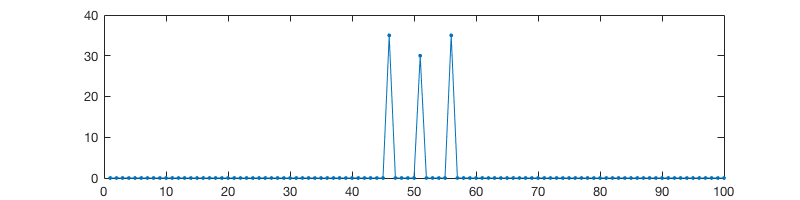

In [15]:
F_shifted = fftshift(F1);
plot(abs(F_shifted),'- .')

## Perform inverse transform

Performing inverse transform is simply `ifft(F1)`. Recall that MATLAB performs the $\frac{1}{N}$ scaling during the inverse transform step.

We use `norm` to check if `ifft(F1)` is close enough to `y1`.

In [16]:
norm(ifft(F1) - y1) % almost zero

ans =
   1.2269e-15


## Mix two signals

Fourier transform and inverse transform are very useful in signal filering. Let's first add a high-frequency noise to our original signal.

In [17]:
f2 = 5; % higher frequency
y2 = 0.2*sin(f2*pi*t); % noise
y = y1 + y2; % add up original signal and noise

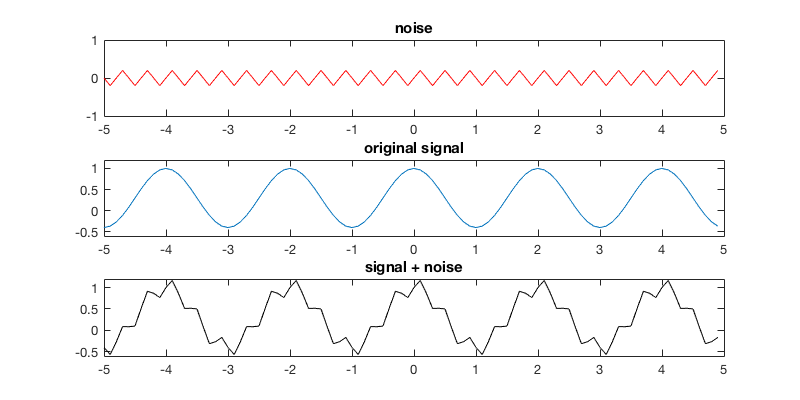

In [18]:
%plot -s 800,400
subplot(311);plot(t, y2, 'r');
ylim([-1,1]);title('noise')

subplot(312);plot(t, y1);
ylim([-0.6,1.2]);title('original signal')

subplot(313);plot(t, y, 'k');
ylim([-0.6,1.2]);title('signal + noise')

After the Fourier transform, we see two new peaks at a relatively higher frequency.

In [19]:
F = fft(y);

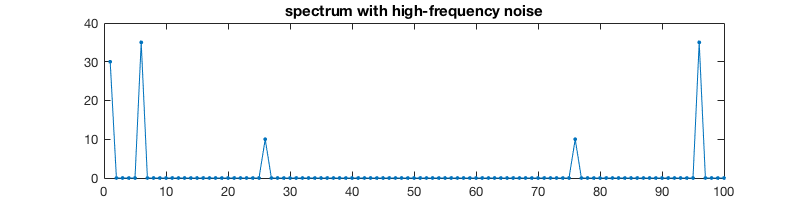

In [20]:
%plot -s 800,200
plot(abs(F), '- .')
title('spectrum with high-frequency noise')

Again, the noise magnitude 0.2 is evenly distributed to positive and negative frequencies. Here we got complex conjugates:

In [21]:
F(2+24)/N, F(end-24)/N % magnitude of noises

ans =
  -0.0000 + 0.1000i
ans =
  -0.0000 - 0.1000i


## Filter out high-frequency noise

Let's wipe out this annoying noise. It's very difficult to do so in the original signal, but very easy to do in the spectrum.

In [22]:
F_filtered = F; % make a copy
F_filtered(26) = 0; % remove the high-frequency noise
F_filtered(76) = 0; % same for negative frequency

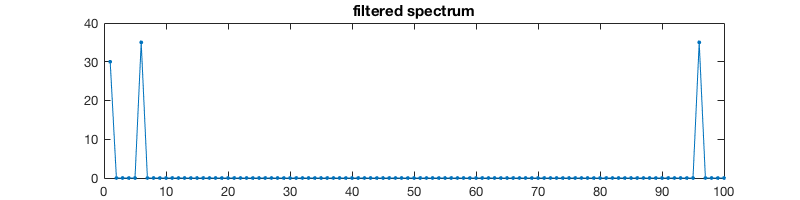

In [23]:
plot(abs(F_filtered), '- .')
title('filtered spectrum')

Then we can transform the spectrum back to the signal.

In [24]:
y_filtered = ifft(F_filtered);

If the filtering is done symmetrically (i.e. do the same thing for positive and negative frequencies), the recovered signal will only contain real numbers.

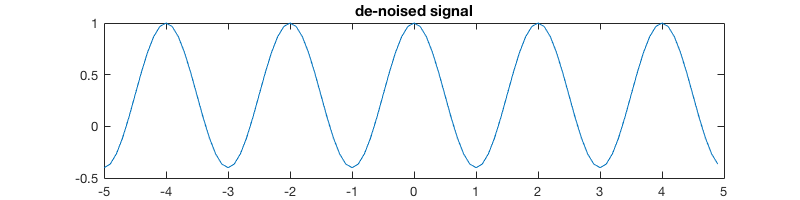

In [35]:
%plot -s 800,200
plot(t, y_filtered)
title('de-noised signal')

The de-noised signal is almost the same as the original noise-free signal:

In [36]:
norm(y_filtered - y1) % almost zero

ans =
   5.6847e-15


## Filter has to be symmetric

What happens if the filtering done asymmetrically?

In [37]:
F_wrong_filtered = F; % make another copy
F_wrong_filtered(76) = 0; % only do negative frequency

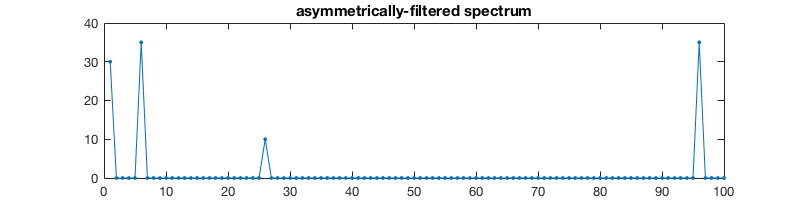

In [39]:
plot(abs(F_wrong_filtered), '- .')
title('asymmetrically-filtered spectrum')

The recovered signal now contains imaginary parts. That's unphysical!

In [40]:
y_wrong_filtered = ifft(F_wrong_filtered);

In [42]:
y_wrong_filtered(1:5)' % print the first several elements

ans =
  -0.4000 - 0.1000i
  -0.4657 + 0.0000i
  -0.2663 + 0.1000i
  -0.0114 - 0.0000i
   0.0837 - 0.1000i


In [43]:
norm(imag(y_wrong_filtered)) % not zero

ans =
    0.7071


You can plot the real part only. It is something between the unfiltered and filtered signals, i.e. the filtering here is incomplete.

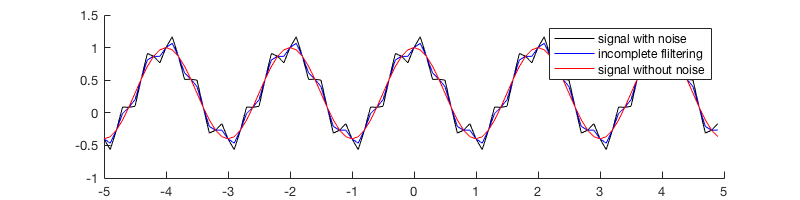

In [45]:
hold on
plot(t, y, 'k')
plot(t, real(y_wrong_filtered), 'b')
plot(t, y1, 'r')
legend('signal with noise', 'incomplete fliltering', 'signal without noise')